<a href="https://colab.research.google.com/github/soundaryasm/Health-insurence/blob/master/Copy_of_health_insurence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import linear_model

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
def map_smoking(column):
    mapped=[]
    
    for value in column:
        
        if value=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
                
    return mapped
df["smoker_norm"]=map_smoking(df["smoker"])


In [ ]:
def map_obese(column):
    mapped=[]
    for value in column:
        if value>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["obese"]=map_obese(df["bmi"])

In [ ]:
def map_sex(column):
    mapped=[]
    for value in column:
        if value=="female":
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped
df["sex_norm"]=map_sex(df["sex"])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_norm  1338 non-null   int64  
 8   obese        1338 non-null   int64  
 9   sex_norm     1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


In [ ]:
df.describe()

,age,bmi,children,charges,smoker_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.526906,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.499462,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

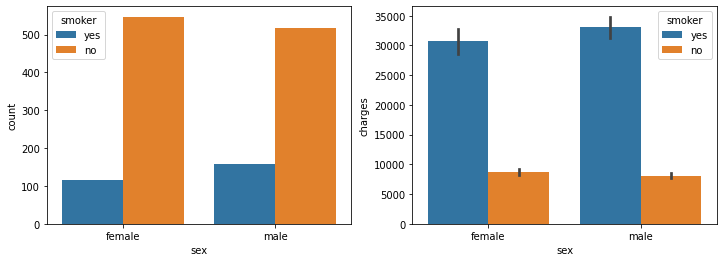

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x='sex',data=df, hue='smoker', ax = axes[0])
sns.barplot(x='sex', y='charges',data=df, hue='smoker', ax = axes[1])

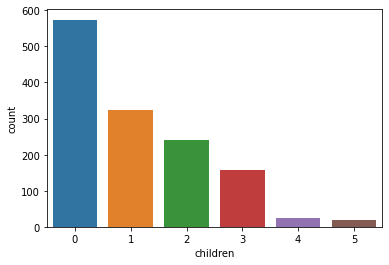

In [ ]:
sns.countplot(x="children", data=df)

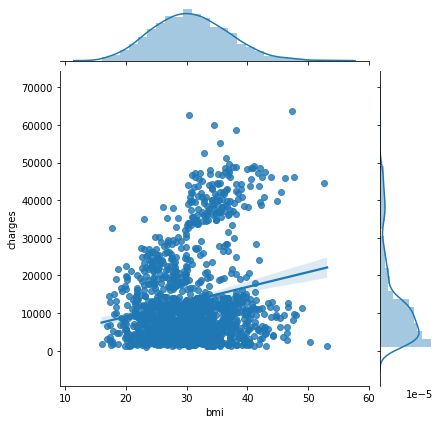

In [ ]:
sns.jointplot(x='bmi',y='charges',data=df,kind='reg')

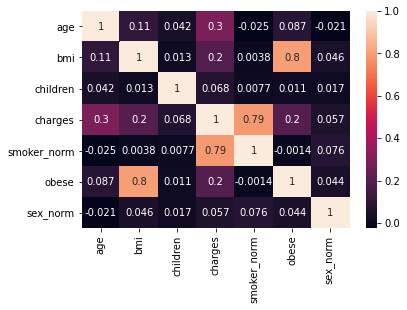

In [ ]:
sns.heatmap(df.corr(), annot=True)

LINEAR REGRESSION

In [ ]:
X = df[['age', 'bmi', 'children','smoker_norm', 'obese']]
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
X_train.head()

,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
# Training the model on  train dataset
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

-6569.117523023115


In [ ]:
lm.coef_

array([  241.39461251,    90.26053022,   537.54489467, 23418.33376791,
        4166.66138097])

In [ ]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,4166.661381


In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

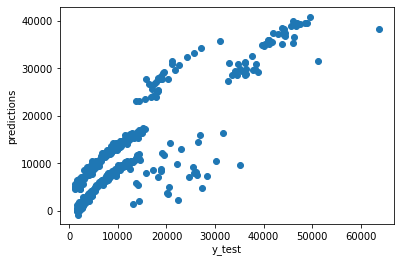

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')


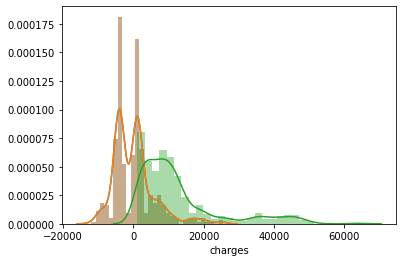

In [ ]:
#Residual Histogram
sns.distplot(y_test-predictions,bins=30);
sns.distplot(y_test-predictions,bins=30)
sns.distplot(y_test,bins=30)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4244.4865180564075
MSE: 33540220.023688886
RMSE: 5791.391890011319


In [ ]:
def calculate_insurance(age,obesity,smoking,inter,cof ):
    age_c = cof[0]
    bmi_c = cof[2]
    smoker_c = cof[4]
    return (age_c*age)+(bmi_c*obesity)+(smoker_c*smoking)+inter

In [ ]:
bmi = [25,30,35,40,45,50,60]
age = 50
smoker = 1
insurance=[]
for value in bmi:
    print('For BMI',value,'Insurance will be:',
          calculate_insurance(age,value,smoker,lm.intercept_,lm.coef_))


For BMI 25 Insurance will be: 23105.896850178877
For BMI 30 Insurance will be: 25793.6213235483
For BMI 35 Insurance will be: 28481.345796917733
For BMI 40 Insurance will be: 31169.070270287157
For BMI 45 Insurance will be: 33856.79474365658
For BMI 50 Insurance will be: 36544.519217026005
For BMI 60 Insurance will be: 41919.96816376486
